<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/iris_knn_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Yu Gothic", "Hiragino Maru Gothic Pro"])

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
X = iris_dataset.data
t = iris_dataset.target
columns = iris_dataset.feature_names

In [ ]:
columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df_X = pd.DataFrame(X, columns=columns)
df_t = pd.DataFrame(t, columns=['target'])

In [ ]:
df_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_X.shape

(150, 4)

In [ ]:
print('Type of data : {}'.format(type(iris_dataset.data)))
print('Type of target : {}'.format(type(iris_dataset['target'])))

Type of data : <class 'numpy.ndarray'>
Type of target : <class 'numpy.ndarray'>


In [ ]:
print('Type of df_X : {}'.format(type(df_X)))
print('Type of df_t : {}'.format(type(df_t)))

Type of df_X : <class 'pandas.core.frame.DataFrame'>
Type of df_t : <class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0) 

In [ ]:
t_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


findfont: Font family ['Yu Gothic', 'Hiragino Maru Gothic Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Yu Gothic', 'Hiragino Maru Gothic Pro'] not found. Falling back to DejaVu Sans.


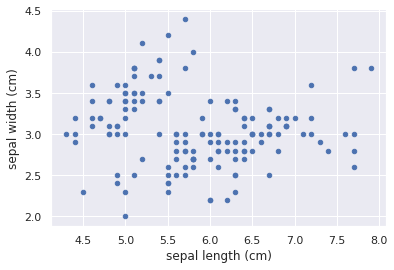

In [ ]:
df_X.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')

In [ ]:
df_X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


findfont: Font family ['Yu Gothic', 'Hiragino Maru Gothic Pro'] not found. Falling back to DejaVu Sans.


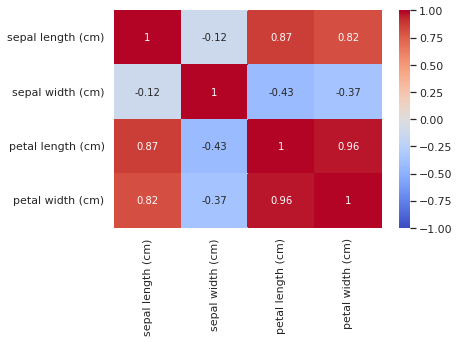

In [ ]:
sns.heatmap(df_X.corr(), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.show()

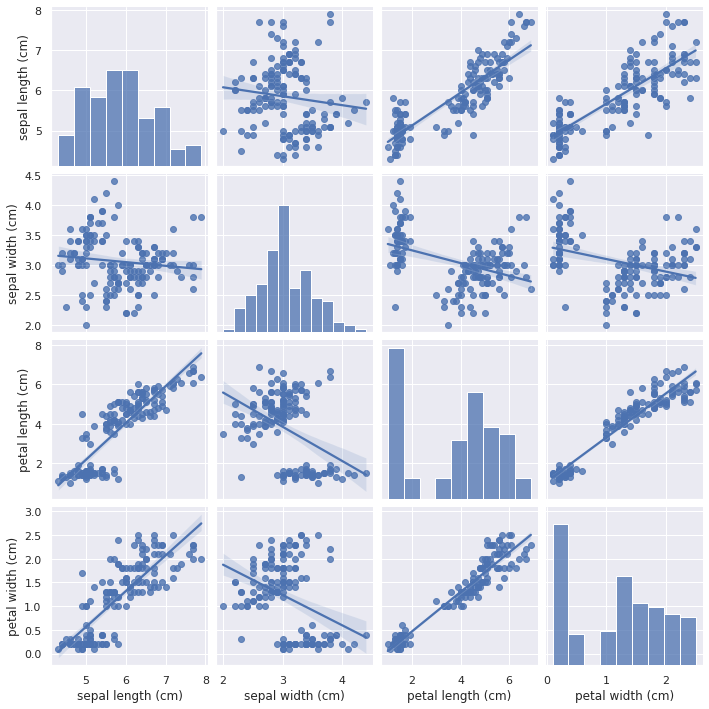

In [ ]:
sns.pairplot(data=df_X, kind='reg')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
knn.fit(X_train, t_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
print('Test set predictions : \n {}'.format(y_pred))

Test set predictions : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print('Test set score : {:.2f}'.format(knn.score(X_test, t_test)))

Test set score : 0.97


In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
pred_new = knn.predict(X_new)
print('Prediction : {}'.format(pred_new))
print('Prediction target name : {}'.format(iris_dataset['target_names'][pred_new]))

Prediction : [0]
Prediction target name : ['setosa']


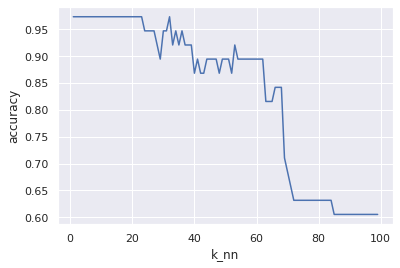

In [ ]:
from sklearn import metrics

accuracy_list = []
k_range = range(1,100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, t_train)
    t_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(t_test, t_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, accuracy_list)
ax.set_xlabel('k_nn')
ax.set_ylabel('accuracy')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

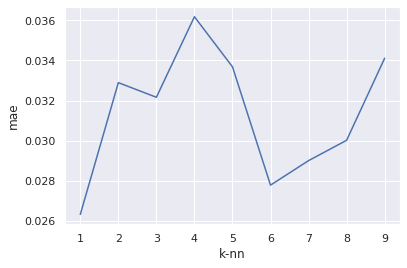

In [ ]:
mae_list = []
sns.set()
k_range = range(1, 10)
for k in k_range:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, t_train)
    t_pred = knn_reg.predict(X_test)
    mae_list.append(mean_squared_error(t_test, t_pred))

figure = plt.figure()
ax = figure.add_subplot(111)
ax.plot(k_range, mae_list)
ax.set_xlabel('k-nn')
ax.set_ylabel('mae')
plt.show()

NameError: ignored

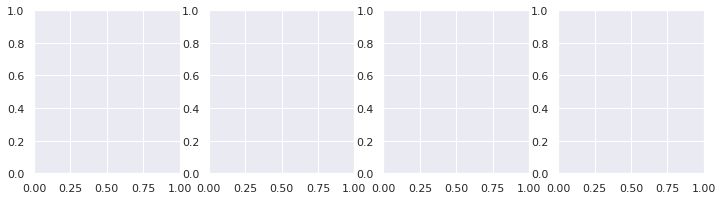

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_neighbors in zip(axes, [1, 3, 6, 10]):
    title = 'n_neighbors'
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(clf, df_X, df_t, ax, title)